In [ ]:
# Mount Google Drive
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

drive.mount('/content/drive')

# Define project path in Drive
PROJECT_PATH = "/content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01"
os.makedirs(PROJECT_PATH, exist_ok=True)

# Ensure subfolders exist
for sub in ["data/raw","data/processed","notebooks","results/eda_visualizations","results/output"]:
    os.makedirs(os.path.join(PROJECT_PATH, sub), exist_ok=True)

print("Project folder ready at:", PROJECT_PATH)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project folder ready at: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01


In [ ]:
# Dataset load
import pandas as pd
RAW_PATH = os.path.join(PROJECT_PATH, "data/raw/heart.csv")
df = pd.read_csv(RAW_PATH)
print("Dataset loaded:", df.shape)
df.head()


Dataset loaded: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# mapping old names to new names
column_name_mapping = {
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'heart_disease'
}

df.rename(columns=column_name_mapping, inplace=True)

# Display the new column names and the first few rows to confirm
print("New Column Names:")
print(df.columns.tolist())
print("\nFirst 3 rows of the renamed dataset:")
print(df.head(3))

New Column Names:
['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease', 'age_log', 'trestbps_log', 'chol_log', 'thalach_log', 'oldpeak_log', 'sex_code', 'cp_code', 'fbs_code', 'restecg_code', 'exang_code', 'slope_code', 'ca_code', 'thal_code', 'age_group', 'age_chol']

First 3 rows of the renamed dataset:
   age  sex  chest_pain_type  resting_bp  cholesterol  fasting_blood_sugar  \
0   52    1                0         125          212                    0   
1   53    1                0         140          203                    1   
2   70    1                0         145          174                    0   

   resting_ecg  max_heart_rate  exercise_angina  st_depression  ...  sex_code  \
0            1             168                0            1.0  ...         1   
1            0             155                1     

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select all numeric columns except target
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove('heart_disease')

# Create copies of dataset
df_scaled_standard = df.copy()
df_scaled_minmax = df.copy()

# Apply StandardScaler
scaler_standard = StandardScaler()
df_scaled_standard[numeric_features] = scaler_standard.fit_transform(df[numeric_features])

# Apply MinMaxScaler (0 to 1)
scaler_minmax = MinMaxScaler()
df_scaled_minmax[numeric_features] = scaler_minmax.fit_transform(df[numeric_features])

# Display first 5 rows for comparison
print("Original Data (first 5 rows):")
print(df[numeric_features].head(), "\n")

print("Standard Scaled Data (first 5 rows):")
print(df_scaled_standard[numeric_features].head(), "\n")

print("MinMax Scaled Data (first 5 rows):")
print(df_scaled_minmax[numeric_features].head())


Original Data (first 5 rows):
   age  sex  chest_pain_type  resting_bp  cholesterol  fasting_blood_sugar  \
0   52    1                0         125          212                    0   
1   53    1                0         140          203                    1   
2   70    1                0         145          174                    0   
3   61    1                0         148          203                    0   
4   62    0                0         138          294                    1   

   resting_ecg  max_heart_rate  exercise_angina  st_depression  ...  \
0            1             168                0            1.0  ...   
1            0             155                1            3.1  ...   
2            1             125                1            2.6  ...   
3            1             161                0            0.0  ...   
4            1             106                0            1.9  ...   

   oldpeak_log  sex_code  cp_code  fbs_code  restecg_code  exang_code  \
0

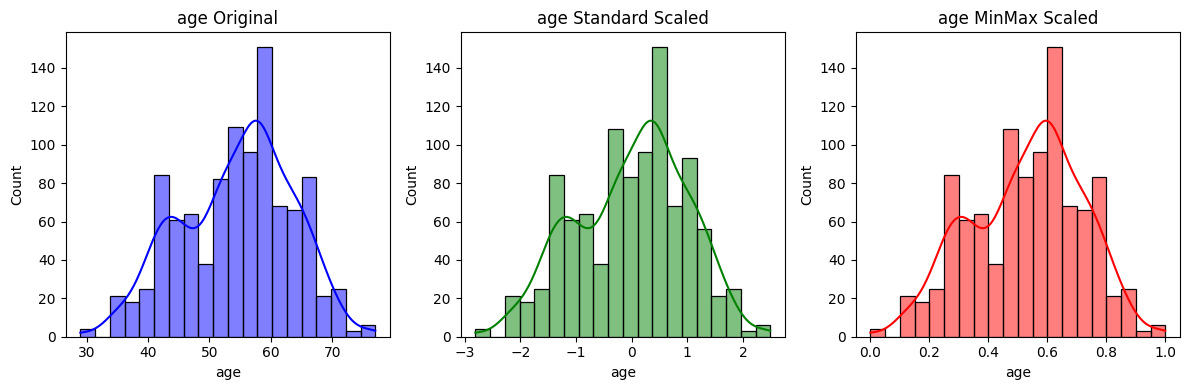

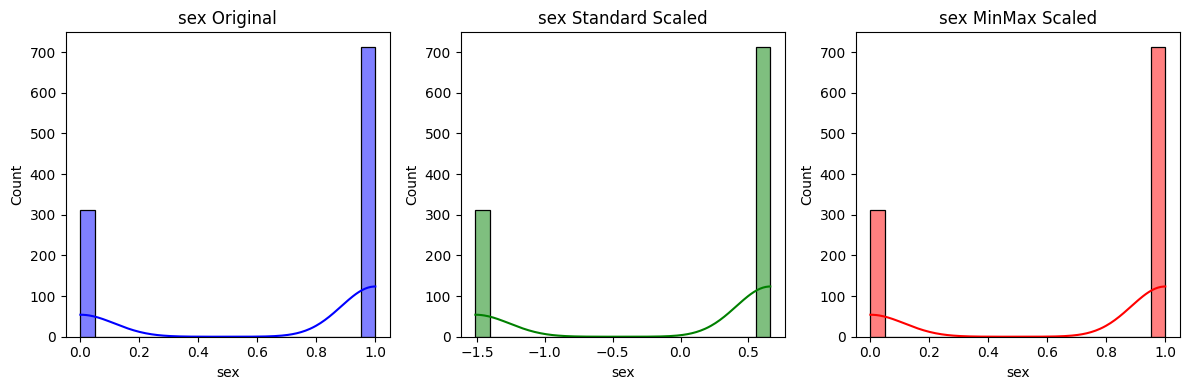

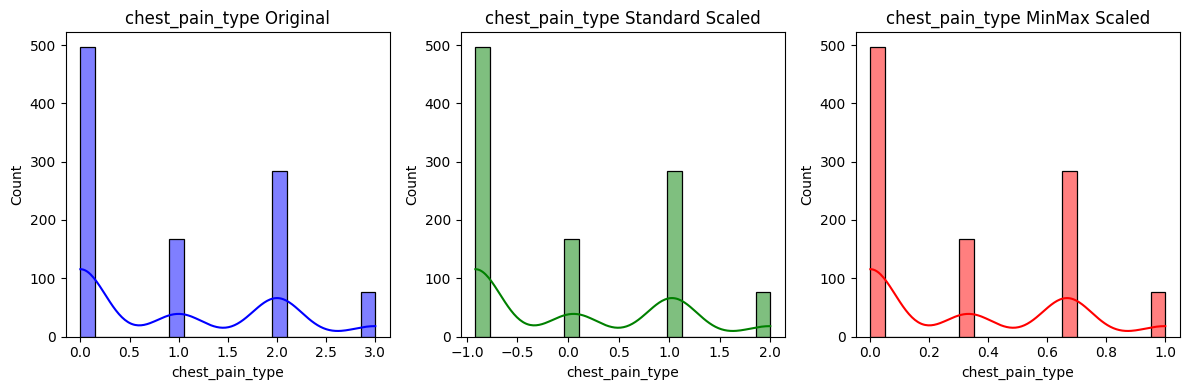

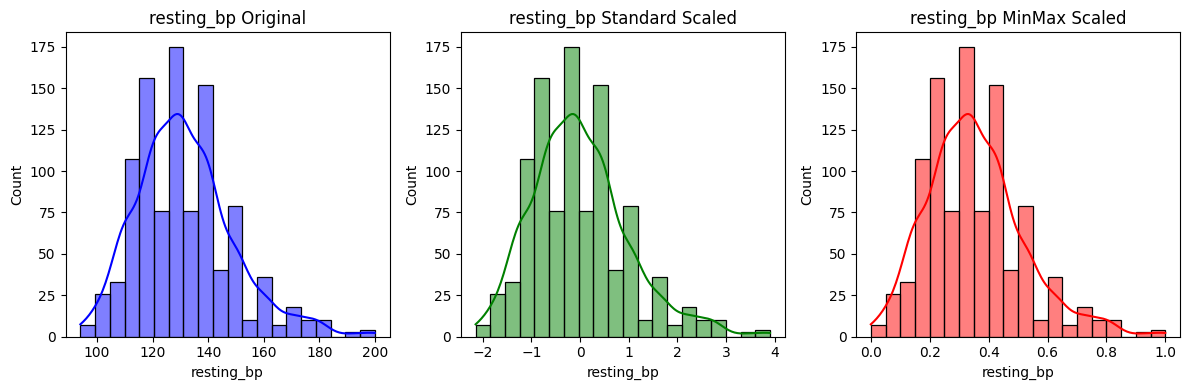

In [ ]:
# Visualization for multiple features

for col in numeric_features[:4]:  # show only first 5 to keep plots manageable
    
    # Show original plot
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    sns.histplot(df[col], bins=20, kde=True, color="blue")
    plt.title(f"{col} Original")

    # Show Standard Scaled plot
    plt.subplot(1,3,2)
    sns.histplot(df_scaled_standard[col], bins=20, kde=True, color="green")
    plt.title(f"{col} Standard Scaled")

    # Show MinMax Scaled plot
    plt.subplot(1,3,3)
    sns.histplot(df_scaled_minmax[col], bins=20, kde=True, color="red")
    plt.title(f"{col} MinMax Scaled")

    plt.tight_layout()
    plt.show()

In [ ]:
# Final scaled dataset
df_final = df_scaled_standard.copy()

print("Final dataset ready for ML:", df_final.shape)
df_final.head()

Final dataset ready for ML: (1025, 29)


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,st_depression,...,sex_code,cp_code,fbs_code,restecg_code,exang_code,slope_code,ca_code,thal_code,age_group,age_chol
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,...,0.661504,-0.915755,-0.418878,0.891255,-0.712287,0.995433,1.209221,1.089852,3,-0.615014
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,...,0.661504,-0.915755,2.387330,-1.004049,1.403928,-2.243675,-0.731971,1.089852,3,-0.681008
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,...,0.661504,-0.915755,-0.418878,0.891255,1.403928,-2.243675,-0.731971,1.089852,4,-0.327130
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,...,0.661504,-0.915755,-0.418878,0.891255,-0.712287,0.995433,0.238625,1.089852,4,-0.276576
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,...,-1.511706,-0.915755,2.387330,0.891255,-0.712287,-0.624121,2.179817,-0.522122,4,1.179033


In [ ]:
# Define save folder
PROJECT_PATH = "/content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01"
SAVE_FOLDER = os.path.join(PROJECT_PATH, "results/eda_visualizations/feature_scaling")
os.makedirs(SAVE_FOLDER, exist_ok=True)

# Save plots
for col in numeric_features:
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    sns.histplot(df[col], bins=20, kde=True, color="blue")
    plt.title(f"{col} Original")

    plt.subplot(1,3,2)
    sns.histplot(df_scaled_standard[col], bins=20, kde=True, color="green")
    plt.title(f"{col} Standard Scaled")

    plt.subplot(1,3,3)
    sns.histplot(df_scaled_minmax[col], bins=20, kde=True, color="red")
    plt.title(f"{col} MinMax Scaled")

    plt.tight_layout()

    # Save each feature plot with its name
    plot_path = os.path.join(SAVE_FOLDER, f"{col}_scaling_comparison.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    print("Plot saved to:", plot_path)

print("All scaling comparison plots saved successfully.")


Plot saved to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/feature_scaling/age_scaling_comparison.png
Plot saved to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/feature_scaling/sex_scaling_comparison.png
Plot saved to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/feature_scaling/chest_pain_type_scaling_comparison.png
Plot saved to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/feature_scaling/resting_bp_scaling_comparison.png
Plot saved to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/feature_scaling/cholesterol_scaling_comparison.png
Plot saved to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/feature_scaling/fasting_blood_sugar_scaling_comparison.png
Plot saved to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/feature_scaling/resting_ecg_scaling_comparison.png
Plot saved to: /content/d

In [ ]:
# Updates .csv file save
df_final = df_scaled_standard.copy()

print("Final dataset ready for ML:", df_final.shape)

# Save processed dataset
PROC_PATH = os.path.join(PROJECT_PATH, "data/processed/IT24102753_scaled(1st).csv")
df_final.to_csv(PROC_PATH, index=False)
print("Saved scaled dataset to:", PROC_PATH)

Final dataset ready for ML: (1025, 29)
Saved scaled dataset to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/data/processed/IT24102753_scaled(1st).csv
